In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

In [2]:
import pandas as pd
from eval.metrics import image_metrics as im, coco_metrics as cm

## Load Predictions and Labels in CSV format

In [3]:
preds_path = '../data/predictions.csv'
labels_path = preds_path

preds_df = pd.read_csv(preds_path)
labels_df = pd.read_csv(labels_path)

In [4]:
preds_df.head()

,id,xmin,ymin,xmax,ymax,label,score,image_name
0,1,686,295,854,451,Car,0.707925,000000001.jpg
1,2,289,1039,475,1212,Car,0.679780,000000001.jpg
2,3,971,677,1192,902,Truck,0.664441,000000001.jpg
3,4,1294,1222,1497,1408,Car,0.645636,000000002.jpg
4,5,686,295,854,451,Truck,0.707925,000000002.jpg


## Calc inference dataframe and output metrics

### Calculate inference dataframe - one row for each bounding box

In [5]:
infer_df = im.get_inference_metrics_from_df(preds_df, labels_df)
infer_df.head()

,image_id,class,TP,TN,FP,FN,Confidence,IoU
0,000000001.jpg,Car,1,0,0,0,0.707925,1.0
1,000000001.jpg,Car,1,0,0,0,0.679780,1.0
2,000000001.jpg,Truck,1,0,0,0,0.664441,1.0
3,000000002.jpg,Car,1,0,0,0,0.645636,1.0
4,000000002.jpg,Truck,1,0,0,0,0.707925,1.0


### Summarise inference dataframe

In [6]:
class_summary_df = im.summarise_inference_metrics(infer_df)
class_summary_df

,class,TP,FP,FN,Total,Precision,Recall
0,Car,3,0,0,3,1.0,1.0
1,Truck,4,0,0,4,1.0,1.0
2,Van,1,0,0,1,1.0,1.0


## Plot from the summary 

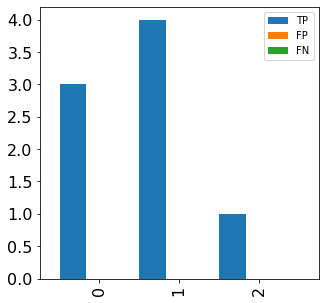

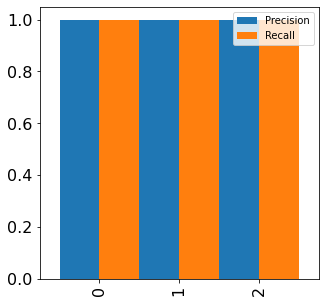

In [9]:
figsize = (5, 5)
fontsize = 16
class_stats = class_summary_df.set_index("class")

fig_confusion = (
    class_summary_df[["TP", "FP", "FN"]]
    .plot(kind="bar", figsize=figsize, width=1, align="center", fontsize=fontsize)
    .get_figure()
)

fig_pr = (
    class_summary_df[["Precision", "Recall"]]
    .plot(kind="bar", figsize=figsize, width=1, align="center", fontsize=fontsize)
    .get_figure()
)

## Coco Metrics

Calculate the coco metrics (from pycocotools) from the predictions and labels dataframes. Optionally choose to output per class values.
The function returns the results as a dictionary

In [8]:
res = cm.get_coco_from_dfs(preds_df, labels_df, False)
res

creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.806
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0

{'All': {'AP_all': 1.0,
  'AP_all_IOU_0_50': 1.0,
  'AP_all_IOU_0_75': 1.0,
  'AP_small': -1.0,
  'AP_medium': -1.0,
  'AP_large': 1.0,
  'AR_all_dets_1': 0.8055555555555556,
  'AR_all_dets_10': 1.0,
  'AR_all': 1.0,
  'AR_small': -1.0,
  'AR_medium': -1.0,
  'AR_large': 1.0}}